In [1]:
from __future__ import annotations
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join(os.path.dirname('file'))
data_dir = os.path.join("data")
data_dir = os.path.abspath(data_dir)

hydro_dir = os.path.join(data_dir,'hydro')
climate_dir = os.path.join(data_dir,'climate')

In [3]:
def csv_dir_to_df(dir,prefix,cols):
    result = {}

    for file in os.listdir(dir):
        if file.startswith(prefix) and file.endswith(".csv"):
            file_path = os.path.abspath(os.path.join(dir, file))
            
            result[file] = pd.read_csv(file_path,header = None,names = cols,encoding="ANSI")
            
    return result

In [4]:
hydro_data: pd.DataFrame
climate_data: pd.DataFrame

hydro_data = csv_dir_to_df(hydro_dir,"mies",["Code","Name","River","Water_year","Water_month","Extrema","Height","Q","Water_temp","Month"])
climate_data = csv_dir_to_df(climate_dir,"k_m_d_",
["Code","Name","Year","Month","Abs_max_temp","State_tmax","Mean_max_temp","State_tmeanmax","Abs_min_temp","State_tmin","Mean_min_temp",
"State_tmeanmin","Mean_temp","State_mean_temp","Min_ground_temp","State_min_tground","Rain_sum","State_rain_sum","Max_daily_rain","Status_max_dayrain",
"First_day_max_rain","Last_day_max_rain","Max_snow","Status_max_snow","Days_w_snow_on_gnd","Days_w_rain","Days_w_snow"])

for hdata in hydro_data:
    df = hydro_data[hdata]
    df.drop(columns=["Code"], inplace=True)
    df.drop(columns=["Q"], inplace=True)
    df.drop(columns=["River"], inplace=True)

    df.drop(df[df["Name"] != "KRAKÓW-BIELANY"].index, inplace=True)
    df.drop(df[df["Extrema"] != 2].index, inplace=True)

for cdata in climate_data:
    df = climate_data[cdata]
    df.drop(columns=["Abs_max_temp"],inplace=True)
    df.drop(columns=["State_tmax"],inplace=True)
    df.drop(columns=["Mean_max_temp"],inplace=True)
    df.drop(columns=["State_tmeanmax"],inplace=True)
    df.drop(columns=["Abs_min_temp"],inplace=True)
    df.drop(columns=["State_tmin"],inplace=True)
    df.drop(columns=["Mean_min_temp"],inplace=True)
    df.drop(columns=["State_tmeanmin"],inplace=True)
    df.drop(columns=["Min_ground_temp"],inplace=True)
    df.drop(columns=["State_min_tground"],inplace=True)
    df.drop(columns=["Max_daily_rain"],inplace=True)
    df.drop(columns=["Status_max_dayrain"],inplace=True)
    df.drop(columns=["First_day_max_rain"],inplace=True)
    df.drop(columns=["Last_day_max_rain"],inplace=True)
    df.drop(columns=["Max_snow"],inplace=True)
    df.drop(columns=["Status_max_snow"],inplace=True)
    df.drop(columns=["Days_w_snow_on_gnd"],inplace=True)
    df.drop(columns=["Days_w_snow"],inplace=True)

    df.drop(columns=["State_mean_temp"],inplace=True)
    df.drop(columns=["State_rain_sum"],inplace=True)

    df.drop(df[df["Name"] != "KRAKÓW-OBSERWATORIUM"].index, inplace=True)


                 Name  Water_year  Water_month  Extrema  Height  Water_temp  \
12562  KRAKÓW-BIELANY        2009            1        2     148         9.0   
12565  KRAKÓW-BIELANY        2009            2        2     166         4.9   
12568  KRAKÓW-BIELANY        2009            3        2     161         1.7   
12571  KRAKÓW-BIELANY        2009            4        2     170         2.8   
12574  KRAKÓW-BIELANY        2009            5        2     241         4.2   

       Month  
12562     11  
12565     12  
12568      1  
12571      2  
12574      3  


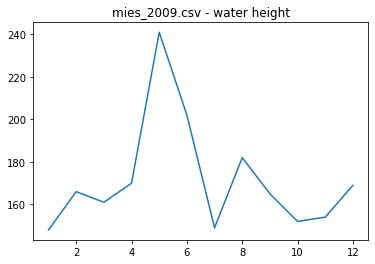

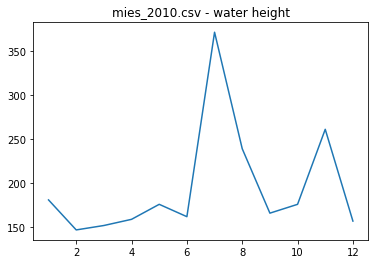

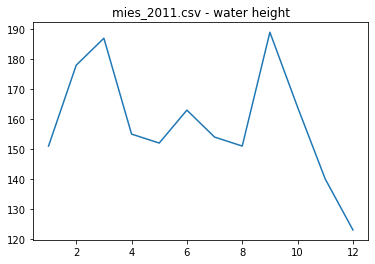

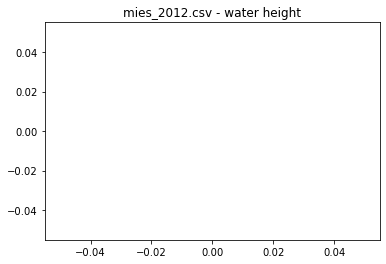

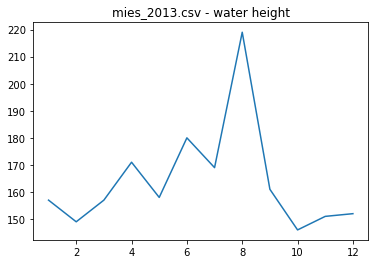

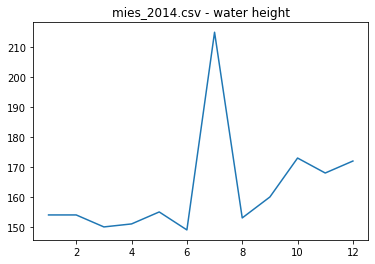

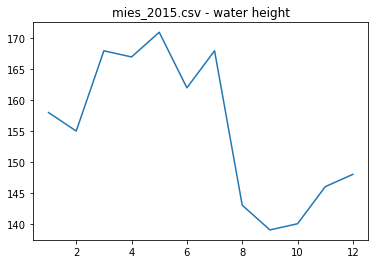

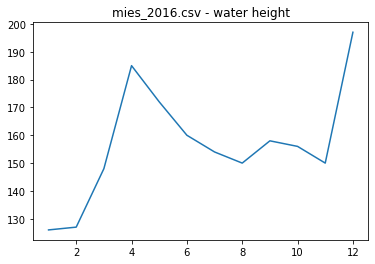

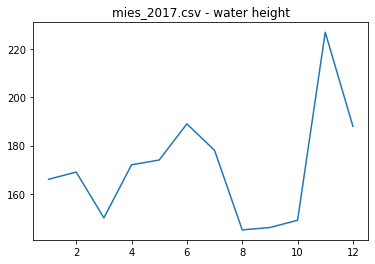

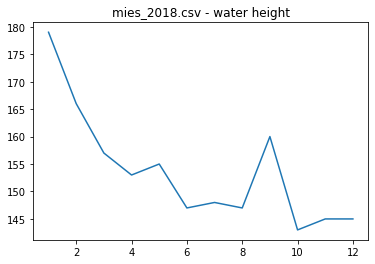

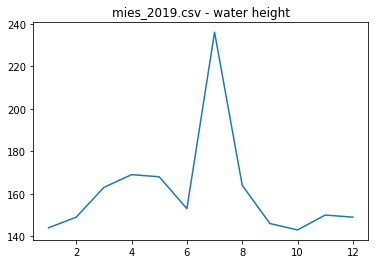

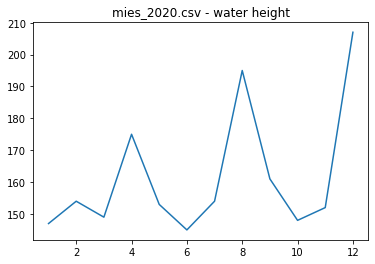

In [5]:
hydro_keys = list(hydro_data.keys())
print(hydro_data[hydro_keys[0]].head())

for key in hydro_keys:
    df: pd.DataFrame
    df = df = hydro_data[key]
    plt.plot(df["Water_month"],df["Height"])
    #print(df["Water_year"])
    plt.title(f"{key} - water height")
    plt.show()




          Code                  Name  Year  Month  Mean_temp  Rain_sum  \
235  250190390  KRAKÓW-OBSERWATORIUM  1951      1       -0.5      29.8   
236  250190390  KRAKÓW-OBSERWATORIUM  1951      2        1.3      26.3   
237  250190390  KRAKÓW-OBSERWATORIUM  1951      3        2.5      38.8   
238  250190390  KRAKÓW-OBSERWATORIUM  1951      4        9.7      61.0   
239  250190390  KRAKÓW-OBSERWATORIUM  1951      5       13.3     132.9   

     Days_w_rain  
235            6  
236            2  
237           10  
238           12  
239           19  


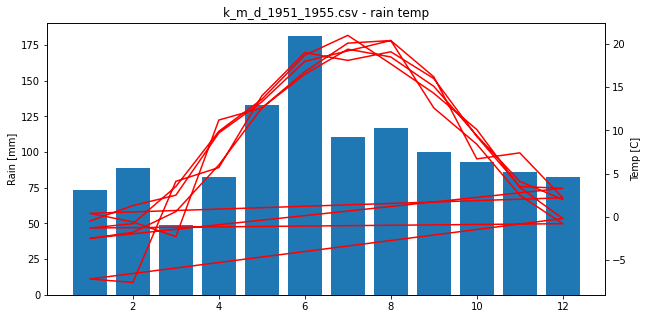

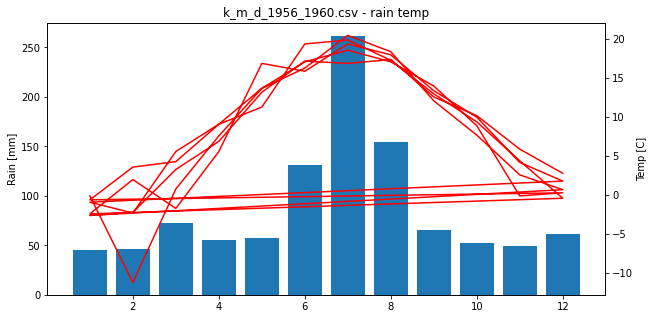

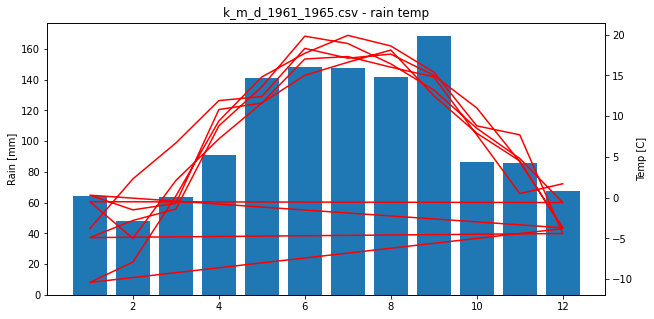

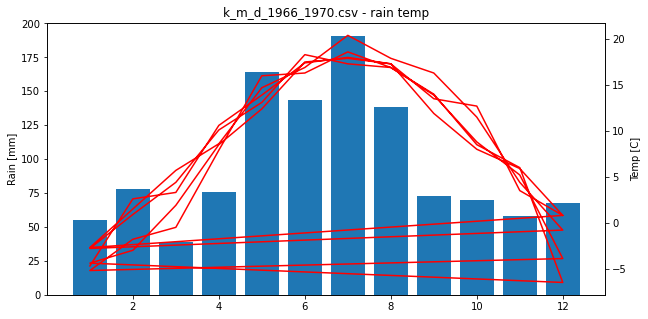

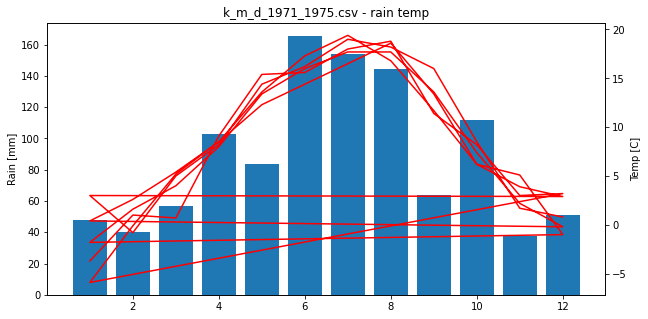

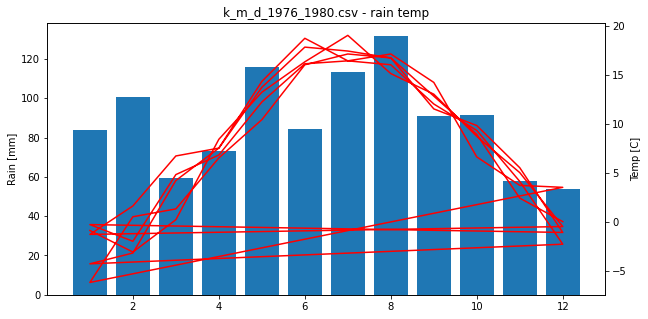

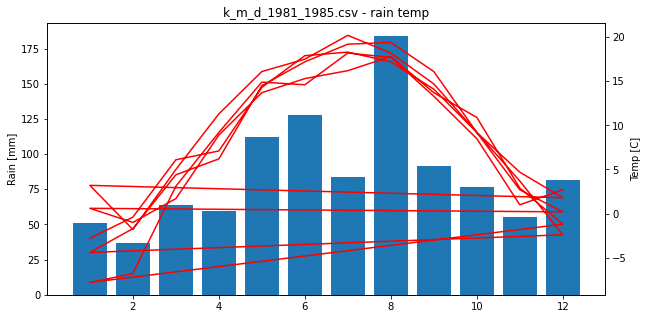

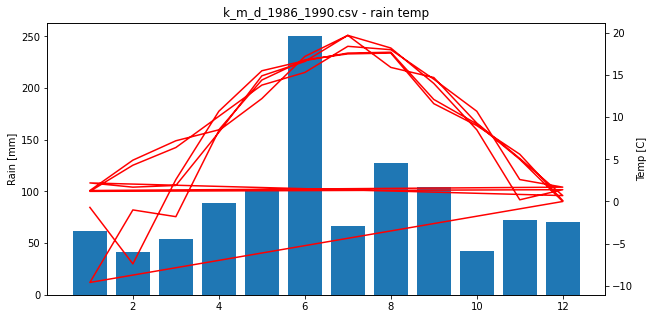

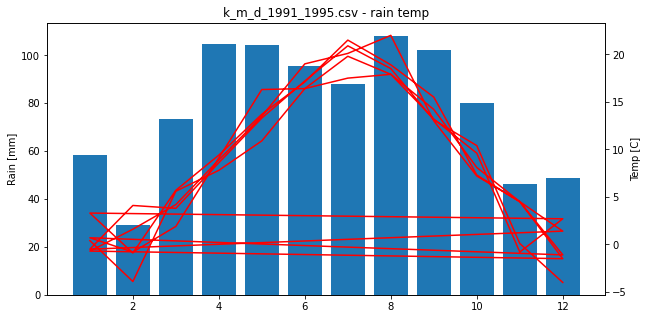

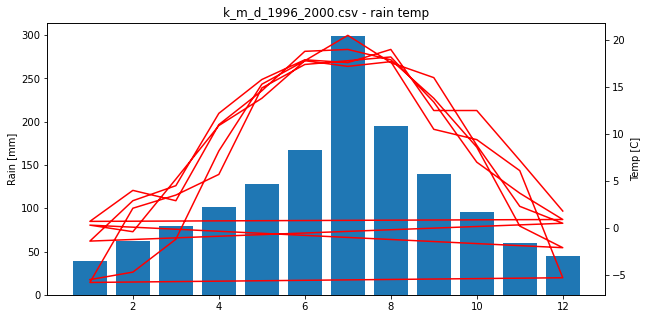

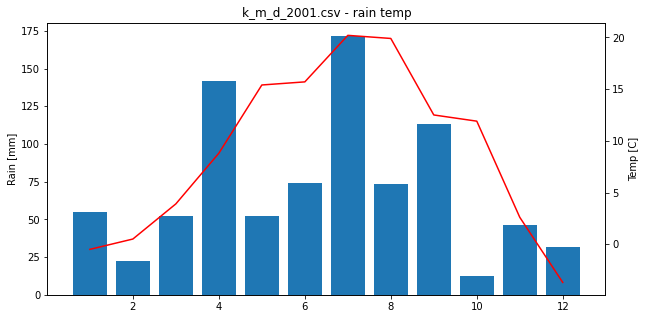

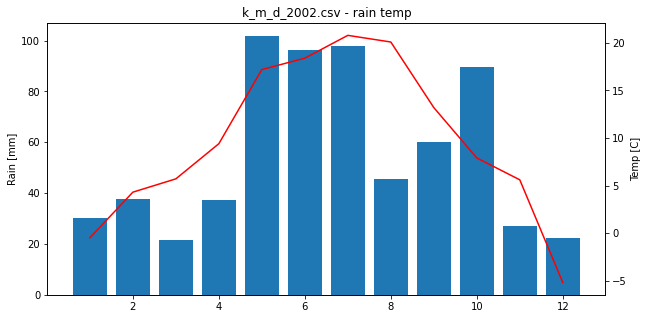

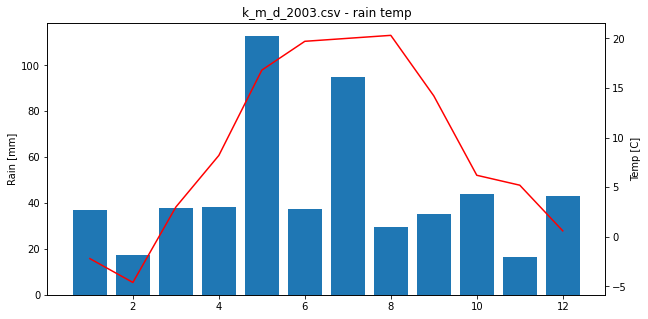

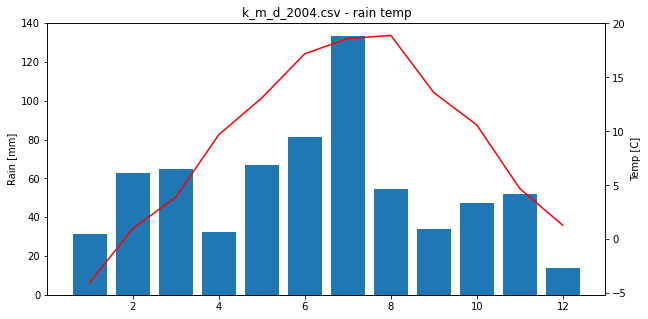

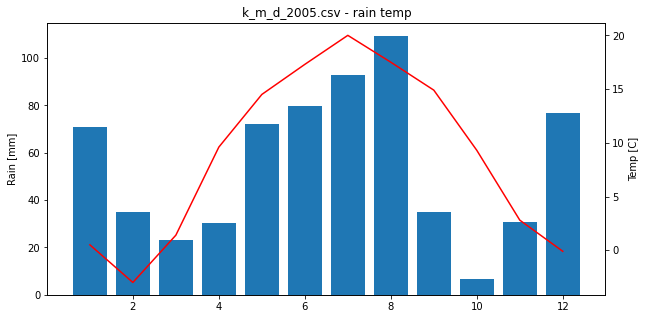

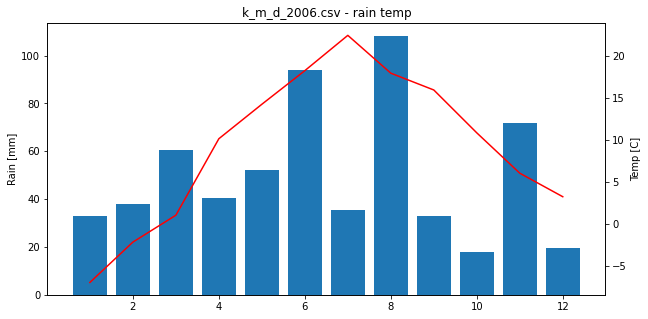

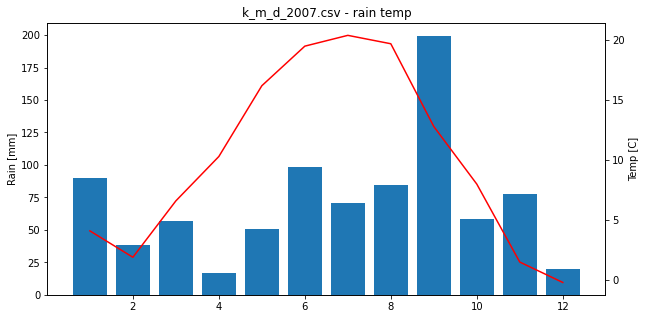

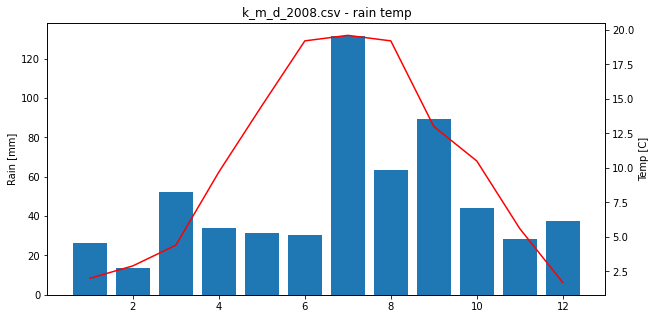

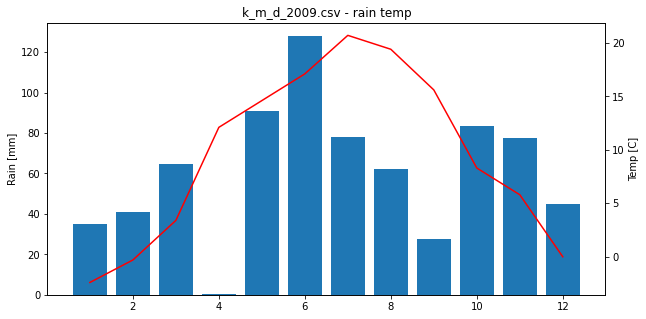

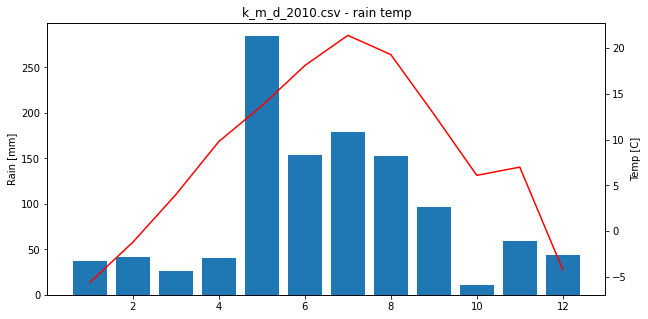

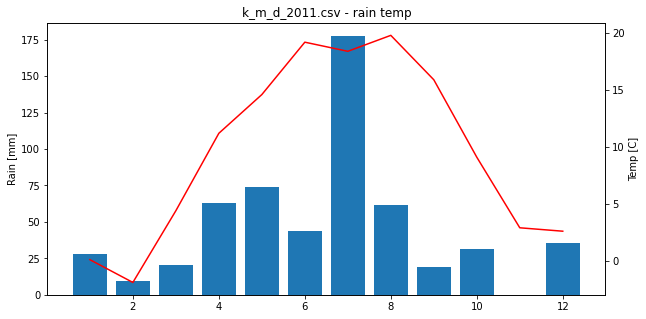

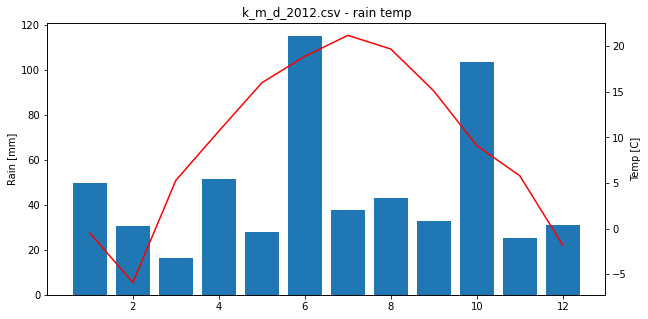

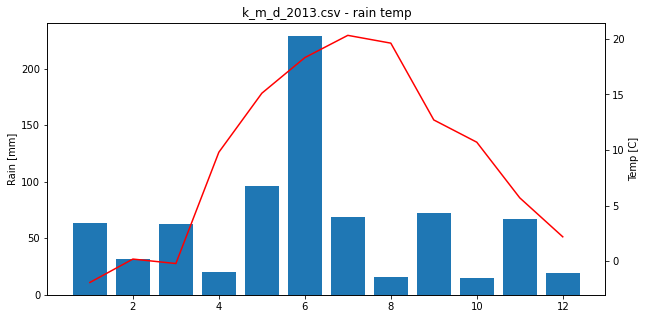

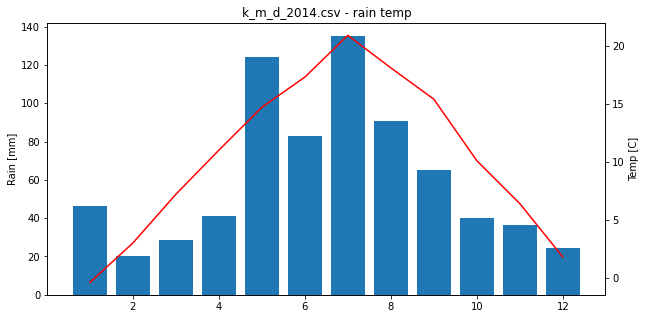

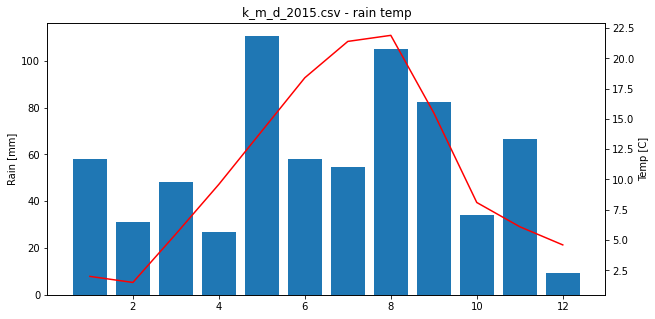

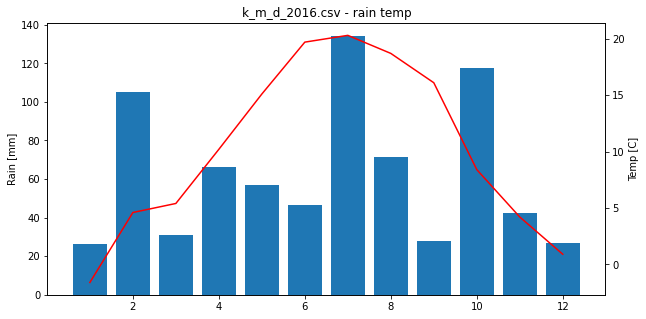

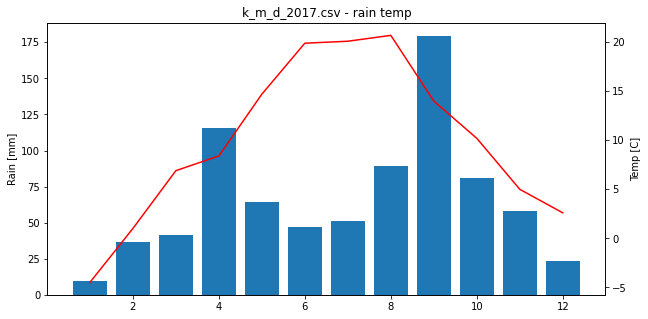

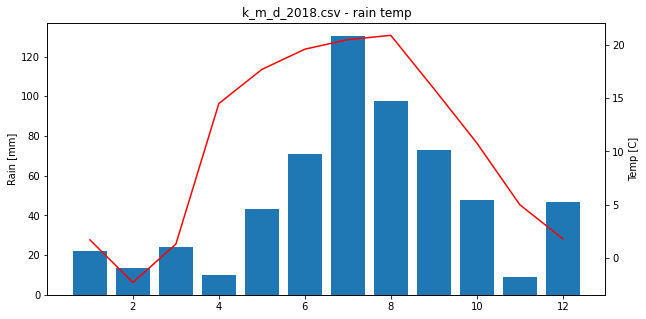

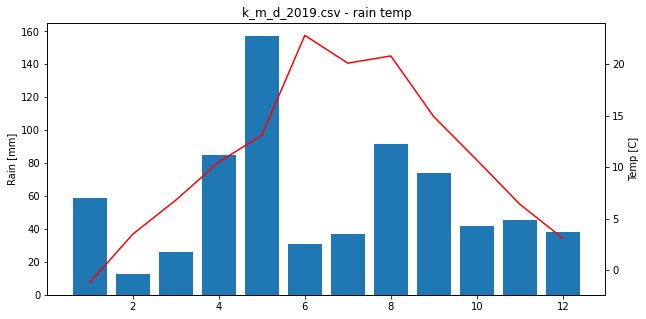

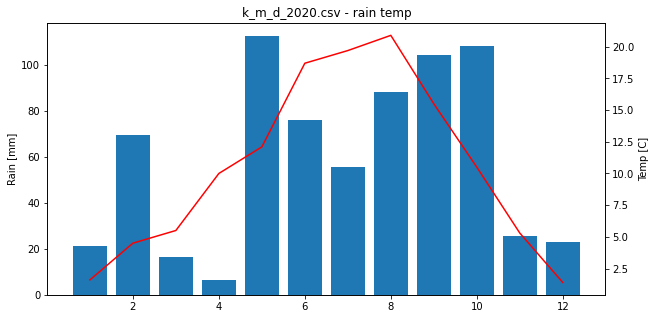

In [6]:
climate_keys = list(climate_data.keys())
print(climate_data[climate_keys[0]].head())

for key in climate_keys:
    df: pd.DataFrame
    df = df = climate_data[key]

    fig, ax1 = plt.subplots(figsize = (10, 5))
    ax2 = ax1.twinx()

    
    ax1.bar(df["Month"],df["Rain_sum"],)
    ax1.set_ylabel("Rain [mm]")
    ax2.plot(df["Month"],df["Mean_temp"],'r')
    ax2.set_ylabel("Temp [C]")
    #print(df["Water_year"])
    plt.title(f"{key} - rain temp")
    plt.show()

In [7]:
merged_df = pd.DataFrame()

for key in climate_keys:
    merged_df = pd.concat([merged_df, climate_data[key]])

merged_df['Name'].replace(["KRAKÓW-OBSERWATORIUM"], 'Cracow',inplace=True)
merged_df.reset_index(inplace=True)
merged_df.drop(columns=["index"], inplace=True)
merged_df.drop(columns=["Code"], inplace=True)
merged_df = merged_df.iloc[:-12, :]

climate_data = merged_df
print(climate_data)

       Name  Year  Month  Mean_temp  Rain_sum  Days_w_rain
0    Cracow  1951      1       -0.5      29.8            6
1    Cracow  1951      2        1.3      26.3            2
2    Cracow  1951      3        2.5      38.8           10
3    Cracow  1951      4        9.7      61.0           12
4    Cracow  1951      5       13.3     132.9           19
..      ...   ...    ...        ...       ...          ...
823  Cracow  2019      8       20.8      91.4           13
824  Cracow  2019      9       14.9      74.0           14
825  Cracow  2019     10       10.7      41.7            8
826  Cracow  2019     11        6.4      45.6           10
827  Cracow  2019     12        3.1      38.4            9

[828 rows x 6 columns]


In [8]:
merged_df = pd.DataFrame()

for key in hydro_keys:
    merged_df = pd.concat([merged_df, hydro_data[key]])

merged_df = merged_df.iloc[2: , :]
merged_df = merged_df.iloc[:-10, :]
merged_df.reset_index(inplace=True)

hydro_data = merged_df
print(hydro_data)

     index            Name  Water_year  Water_month  Extrema  Height  \
0    12568  KRAKÓW-BIELANY        2009            3        2     161   
1    12571  KRAKÓW-BIELANY        2009            4        2     170   
2    12574  KRAKÓW-BIELANY        2009            5        2     241   
3    12577  KRAKÓW-BIELANY        2009            6        2     202   
4    12580  KRAKÓW-BIELANY        2009            7        2     149   
..     ...             ...         ...          ...      ...     ...   
115  13420  KRAKÓW-BIELANY        2019           10        2     143   
116  13423  KRAKÓW-BIELANY        2019           11        2     150   
117  13426  KRAKÓW-BIELANY        2019           12        2     149   
118  13252  KRAKÓW-BIELANY        2020            1        2     147   
119  13255  KRAKÓW-BIELANY        2020            2        2     154   

     Water_temp  Month  
0           1.7      1  
1           2.8      2  
2           4.2      3  
3          10.8      4  
4         

In [9]:
#extracted_col = hydro_data["Height"]
#print(extracted_col)
#climate_data = climate_data.join(extracted_col)

final_data = climate_data

0      161
1      170
2      241
3      202
4      149
      ... 
115    143
116    150
117    149
118    147
119    154
Name: Height, Length: 120, dtype: int64


In [10]:
print(final_data)
final_data.to_csv(r'tidy_data.csv', index=False)

       Name  Year  Month  Mean_temp  Rain_sum  Days_w_rain  Height
0    Cracow  1951      1       -0.5      29.8            6   161.0
1    Cracow  1951      2        1.3      26.3            2   170.0
2    Cracow  1951      3        2.5      38.8           10   241.0
3    Cracow  1951      4        9.7      61.0           12   202.0
4    Cracow  1951      5       13.3     132.9           19   149.0
..      ...   ...    ...        ...       ...          ...     ...
823  Cracow  2019      8       20.8      91.4           13     NaN
824  Cracow  2019      9       14.9      74.0           14     NaN
825  Cracow  2019     10       10.7      41.7            8     NaN
826  Cracow  2019     11        6.4      45.6           10     NaN
827  Cracow  2019     12        3.1      38.4            9     NaN

[828 rows x 7 columns]
